## K-means

In [25]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt 
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
np.random.seed(42)

Initializing Data sample

In [26]:
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[0.2, 2.3],
    [-1.5, 2.3],
    [-2.8, 1.8],
    [-2.8, 2.8],
    [-2.8, 1.3]
    ]
)
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

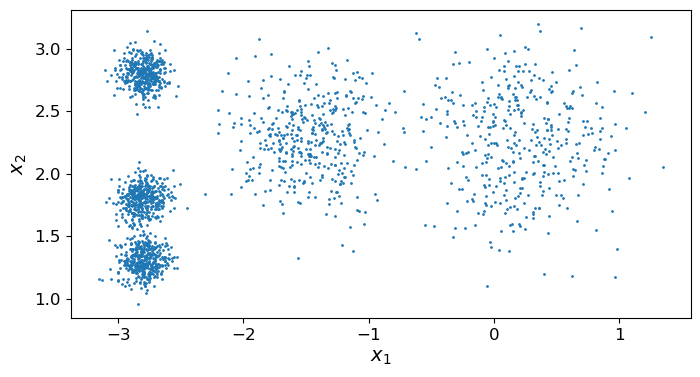

In [27]:
X,y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)
def plot_clusters(X, y=None):
    plt.scatter(X[:,0], X[:, 1], c=y, s=1)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
plt.figure(figsize=(8,4))
plot_clusters(X)
plt.show()

Decision boundary

In [32]:
from sklearn.cluster import KMeans
k=5
kmeans = KMeans(n_clusters=k, n_init=50, random_state=42)
y_pred = kmeans.fit_predict(X)

In [33]:
y_pred

array([0, 4, 1, ..., 3, 1, 4], dtype=int32)

In [34]:
kmeans.labels_

array([0, 4, 1, ..., 3, 1, 4], dtype=int32)

In [35]:
kmeans.cluster_centers_

array([[-2.80037642,  1.30082566],
       [ 0.20876306,  2.25551336],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80389616,  1.80117999]])

In [44]:
def plot_data(X):
    plt.plot(X[:,0], X[:,1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max()/10]
    plt.scatter(centroids[:,0], centroids[:,1], marker='o', s=30, linewidths=8, 
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=50, linewidths=50, 
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                            show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                        np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap='Pastel2')
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)
    if show_xlabels:
        plt.xlabel('$x_1$')
    else:
        plt.tick_params(labelbottom='off')
    if show_ylabels:
        plt.ylabel('$x_2$')
    else:
        plt.tick_params(labelleft='off')

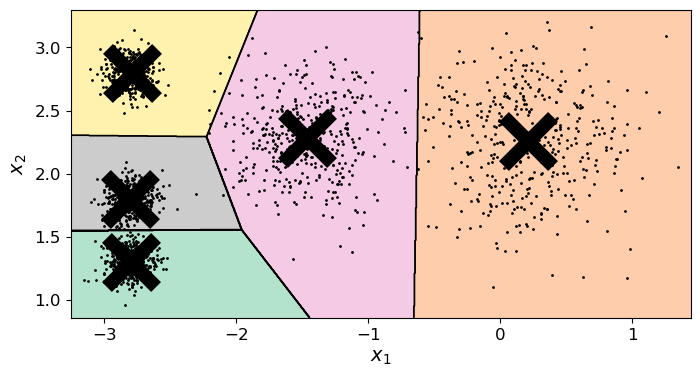

In [45]:
plt.figure(figsize=(8,4))
plot_decision_boundaries(kmeans, X)
plt.show()